In [4]:
#Librerias Necesarias

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.linear_model import LinearRegression

In [5]:
df_1 = pd.read_excel("ADINELSA_ANCASH.xlsx",sheet_name="BOLOGNESI")

# Convertir PERIODO a un formato datetime (año y mes)
df_1['PERIODO'] = pd.to_datetime(df_1['PERIODO'].astype(str), format='%Y%m')
df_1.set_index('PERIODO', inplace=True)  # Usar PERIODO como índice
print(df_1)


            CONSUMO   PROMEDIO  CANTIDAD
PERIODO                                 
2023-03-01     2812  12.787800       220
2023-04-01     3282  12.870588       220
2023-05-01     3512  15.963636       220
2023-06-01     3595  15.977778       225
2023-07-01     3595  15.977778       225
2023-08-01     3695  16.422222       225
2023-09-01     3783  16.813333       225
2023-10-01     4449  19.773333       225
2023-11-01     3708  16.480000       225
2023-12-01     3320  14.821429       224
2024-01-01     3783  16.888393       224
2024-02-01     3130  13.376068       234
2024-03-01     2920  11.450980       255
2024-04-01     3282  12.870588       255
2024-05-01     3514  13.726562       256
2024-06-01     3110  12.148438       256
2024-07-01     3311  12.933594       256
2024-08-01     3127  12.214844       256
2024-09-01     3535  13.808594       256


In [6]:
# Media móvil no centrada

media_nocentrada = df_1['CONSUMO'].rolling(window=3, center=False).mean()
print("Media no centrada:\n", media_nocentrada)

Media no centrada:
 PERIODO
2023-03-01            NaN
2023-04-01            NaN
2023-05-01    3202.000000
2023-06-01    3463.000000
2023-07-01    3567.333333
2023-08-01    3628.333333
2023-09-01    3691.000000
2023-10-01    3975.666667
2023-11-01    3980.000000
2023-12-01    3825.666667
2024-01-01    3603.666667
2024-02-01    3411.000000
2024-03-01    3277.666667
2024-04-01    3110.666667
2024-05-01    3238.666667
2024-06-01    3302.000000
2024-07-01    3311.666667
2024-08-01    3182.666667
2024-09-01    3324.333333
Name: CONSUMO, dtype: float64


In [7]:
# Media móvil centrada
media_centrada = df_1['CONSUMO'].rolling(window=3, center=True).mean()

print("Media centrada:\n", media_centrada)



Media centrada:
 PERIODO
2023-03-01            NaN
2023-04-01    3202.000000
2023-05-01    3463.000000
2023-06-01    3567.333333
2023-07-01    3628.333333
2023-08-01    3691.000000
2023-09-01    3975.666667
2023-10-01    3980.000000
2023-11-01    3825.666667
2023-12-01    3603.666667
2024-01-01    3411.000000
2024-02-01    3277.666667
2024-03-01    3110.666667
2024-04-01    3238.666667
2024-05-01    3302.000000
2024-06-01    3311.666667
2024-07-01    3182.666667
2024-08-01    3324.333333
2024-09-01            NaN
Name: CONSUMO, dtype: float64


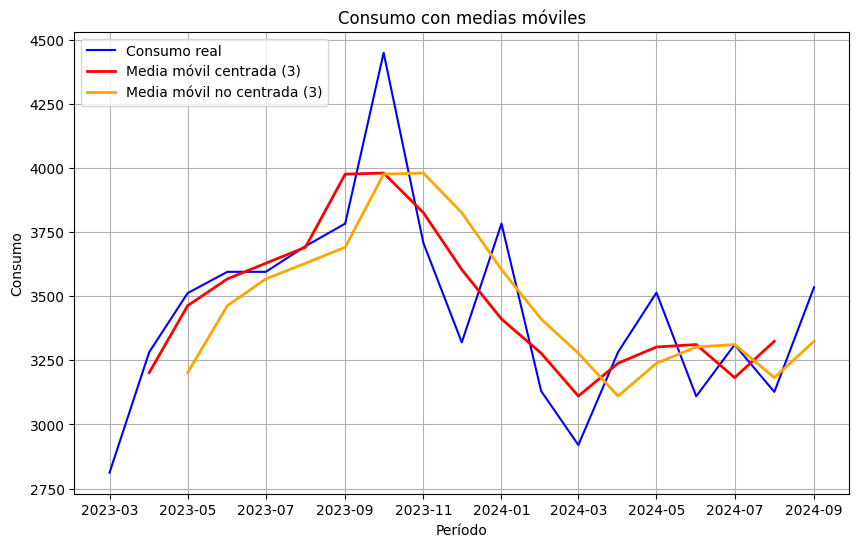

In [8]:
# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(df_1['CONSUMO'], label='Consumo real', color='blue')
plt.plot(media_centrada, label='Media móvil centrada (3)', color='red', linewidth=2)
plt.plot(media_nocentrada, label='Media móvil no centrada (3)', color='orange', linewidth=2)

plt.title("Consumo con medias móviles")
plt.xlabel("Período")
plt.ylabel("Consumo")
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [9]:
# Suavización exponencial
suavizador = SimpleExpSmoothing(df_1['CONSUMO']).fit(smoothing_level=0.75, optimized=False)
suavi_exp = suavizador.fittedvalues
forecast = suavizador.forecast(2)  # Pronosticar 3 meses futuros

# Mostrar resultados
print("Valores suavizados:\n", suavi_exp)
print("Pronósticos para los próximos períodos:\n", forecast)


Valores suavizados:
 PERIODO
2023-03-01    2812.000000
2023-04-01    2812.000000
2023-05-01    3164.500000
2023-06-01    3425.125000
2023-07-01    3552.531250
2023-08-01    3584.382812
2023-09-01    3667.345703
2023-10-01    3754.086426
2023-11-01    4275.271606
2023-12-01    3849.817902
2024-01-01    3452.454475
2024-02-01    3700.363619
2024-03-01    3272.590905
2024-04-01    3008.147726
2024-05-01    3213.536932
2024-06-01    3438.884233
2024-07-01    3192.221058
2024-08-01    3281.305265
2024-09-01    3165.576316
dtype: float64
Pronósticos para los próximos períodos:
 2024-10-01    3442.644079
2024-11-01    3442.644079
Freq: MS, dtype: float64


d:\TAN-S15-ST\EnvTanTsS15\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


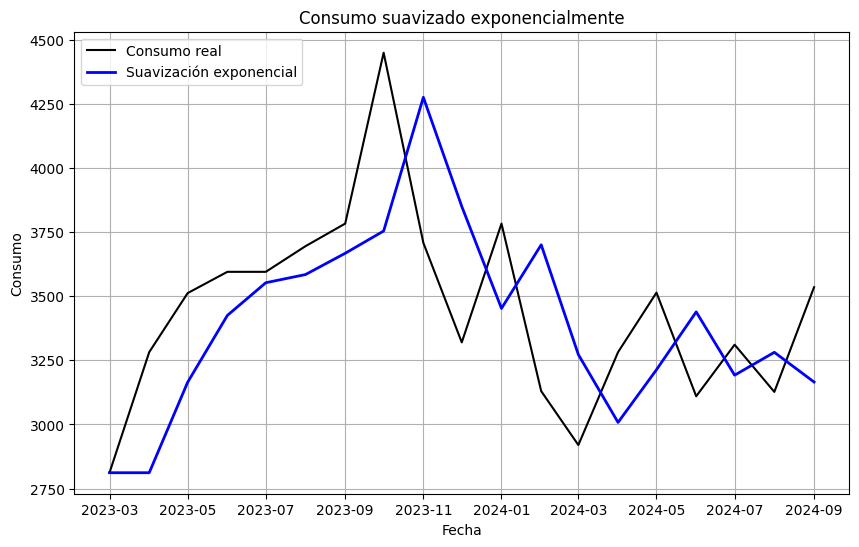

In [10]:

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_1['CONSUMO'], label='Consumo real', color='black')
plt.plot(suavi_exp, label='Suavización exponencial', color='blue', linewidth=2)
plt.title("Consumo suavizado exponencialmente")
plt.xlabel("Fecha")
plt.ylabel("Consumo")
plt.legend(loc='upper left')
plt.grid()
plt.show()

C:\Users\rosaf\AppData\Local\Temp\ipykernel_18496\467229122.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fecha_range = pd.date_range(fecha_inicio, fecha_fin, freq='M')


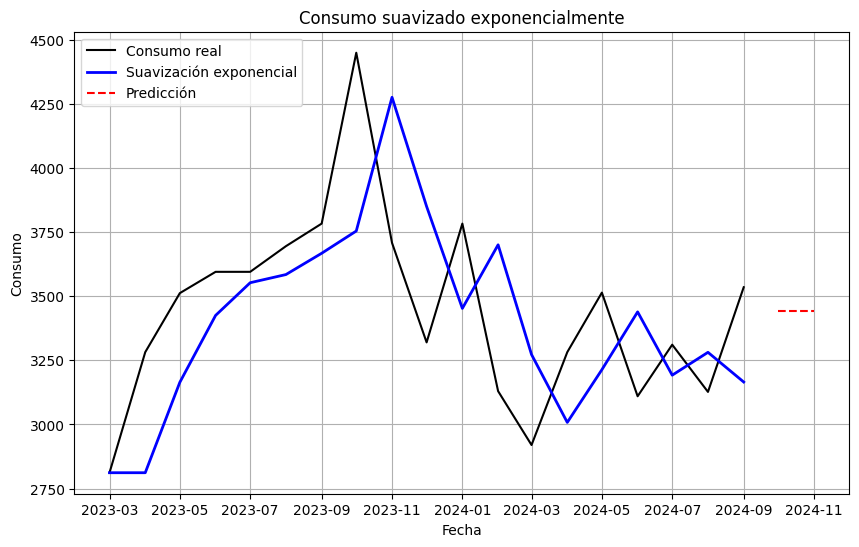

In [11]:
# Crea un rango de fechas que comience en la fecha de inicio de tus datos
fecha_inicio = df_1.index[-1]
fecha_fin = fecha_inicio + pd.DateOffset(months=len(forecast))

# Crea un rango de fechas con la fecha de inicio y fin
fecha_range = pd.date_range(fecha_inicio, fecha_fin, freq='M')




# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_1['CONSUMO'], label='Consumo real', color='black')
plt.plot(suavi_exp, label='Suavización exponencial', color='blue', linewidth=2)
plt.plot(forecast, label='Predicción', color='red', linestyle='--')
plt.title("Consumo suavizado exponencialmente")
plt.xlabel("Fecha")
plt.ylabel("Consumo")
plt.legend(loc='upper left')
plt.grid()
plt.show()

Intercepto: 3555.2280701754385
Pendiente: -10.980701754385963
Predicciones para los próximos períodos: [3335.61403509 3324.63333333 3313.65263158]


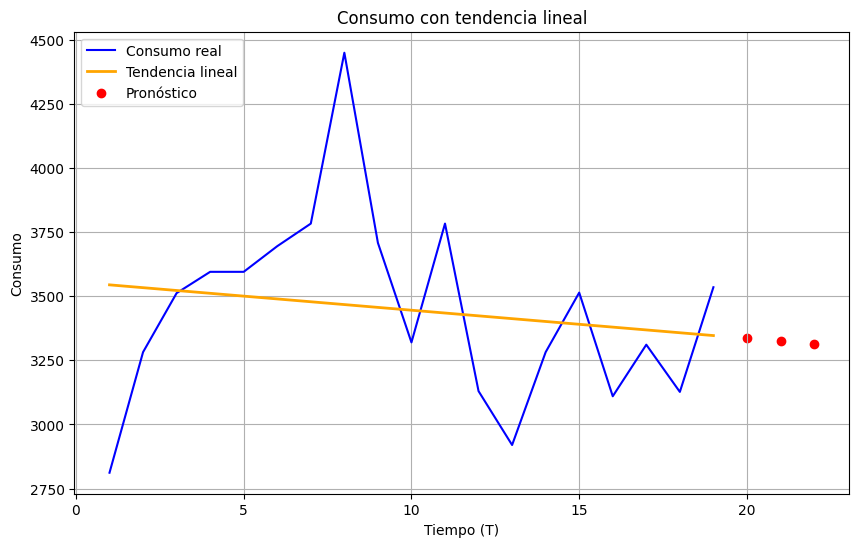

In [12]:
# Variable de tiempo basada en índices
df_1['T'] = range(1, len(df_1) + 1)

# Regresión lineal
from sklearn.linear_model import LinearRegression

X = df_1[['T']]
y = df_1['CONSUMO']
modelo = LinearRegression().fit(X, y)

# Predicciones futuras
nuevos_t = pd.DataFrame({'T': [len(df_1) + 1, len(df_1) + 2, len(df_1) + 3]})
predicciones = modelo.predict(nuevos_t)

# Mostrar resultados
print("Intercepto:", modelo.intercept_)
print("Pendiente:", modelo.coef_[0])
print("Predicciones para los próximos períodos:", predicciones)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_1['T'], y, label='Consumo real', color='blue')
plt.plot(df_1['T'], modelo.predict(X), label='Tendencia lineal', color='orange', linewidth=2)
plt.scatter(nuevos_t, predicciones, label='Pronóstico', color='red')
plt.title("Consumo con tendencia lineal")
plt.xlabel("Tiempo (T)")
plt.ylabel("Consumo")
plt.legend(loc='upper left')
plt.grid()
plt.show()

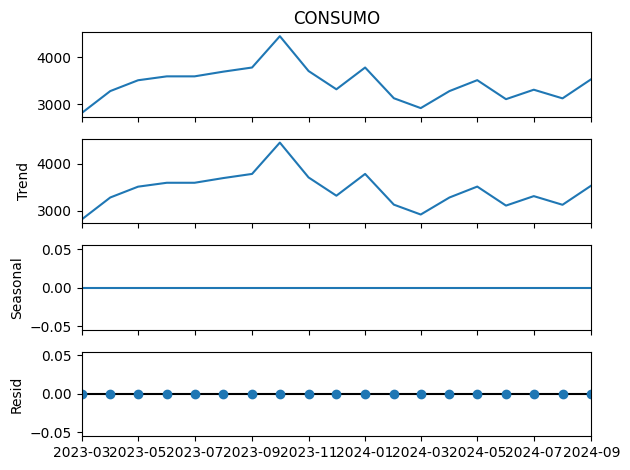

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_1['CONSUMO'],model='additive',period=1)
decompose.plot()
plt.show()